## Implementation of the KNN Algorithm

In [1]:
import pandas as pd

load and use titanic data

In [5]:
df= pd.read_csv('../day5_titanic/train.csv')

In [8]:
print(df.head(15))
print(df.shape)

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

Data Preparation Steps: to convert al to numerical columns

Drop passenger id, Name, Ticket columns, y = Survived.

Since classification is based on distance need to convert non numeric types to numeric types.
Convert to binary notation Sex, Embarked, Cabin 


In [20]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y = df['Survived']
# convert categorical to binary
X_encoded = pd.get_dummies(X,columns=['Sex','Embarked'])

In [21]:
X_encoded['cabin_flag'] = X_encoded['Cabin'].notna().astype(int)
X_encoded= X_encoded.drop(['Cabin'],axis=1)
X_encoded.isna().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
cabin_flag      0
dtype: int64

### Incorrect step: Need to impute after train test split

In [23]:
col='Age'
X_encoded[col] = X_encoded[col].fillna(X_encoded[col].median())
X_encoded.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
cabin_flag    0
dtype: int64

In [27]:
X_encoded = X_encoded.astype(float)

X_encoded.dtypes

Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
cabin_flag    float64
dtype: object

In [28]:
X_encoded.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_flag
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0


## KNN Without standardizing age and Fare

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
y_pred = knn.predict(X_test)


In [33]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.664804469273743

📊 Confusion Matrix:
 [[84 26]
 [34 35]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       110
           1       0.57      0.51      0.54        69

    accuracy                           0.66       179
   macro avg       0.64      0.64      0.64       179
weighted avg       0.66      0.66      0.66       179



## Scaling features

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
y_pred = knn.predict(X_test_scaled)


In [37]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8156424581005587

📊 Confusion Matrix:
 [[95 15]
 [18 51]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



### Scaling features has improved accuracy from 0.66 to 0.815

## Optimal k

In [39]:
import matplotlib.pyplot as plt

k= 3 | Train Acc: 0.869 | Test Acc: 0.799
k= 5 | Train Acc: 0.858 | Test Acc: 0.816
k= 9 | Train Acc: 0.844 | Test Acc: 0.810
k=17 | Train Acc: 0.837 | Test Acc: 0.799
k=21 | Train Acc: 0.830 | Test Acc: 0.799
k=26 | Train Acc: 0.824 | Test Acc: 0.793
k=33 | Train Acc: 0.812 | Test Acc: 0.804
k=65 | Train Acc: 0.775 | Test Acc: 0.788


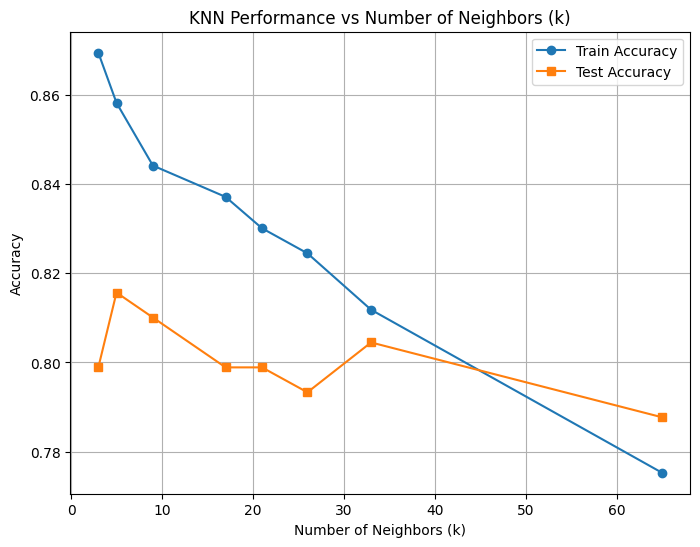

In [43]:

k_values = [3, 5, 9, 17, 21, 26, 33,65]
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f"k={k:2d} | Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")

# ----------------------------------------------
# 4. Plot results
# ----------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy')
plt.title("KNN Performance vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Implementation of KNN from scratch

In [42]:
type(y)

pandas.core.series.Series

#### Inputs: standardized matrix X with all numbers, labelled series y
#### Parameter K

#### Pseudo code

For a given example X_test
1) Standardize it to get X_test_scaled
2) find the distance between X_test_scaled and all examples in X_train_scaled
3) Sort in descending order, do arg max 


In [47]:
import numpy as np
X_train_mean = np.mean(X_train,axis=0)

In [48]:
print(X_train.shape)
print(X_train_mean.shape)

(712, 11)
(11,)


In [50]:
X_train_std = np.std(X_train,axis=0)
print(X_train_std.shape)

(11,)


In [53]:
X_test_scaled = (X_test - X_train_mean)/X_train_std

In [54]:
X_test_scaled.shape

(179, 11)

In [56]:
m=X_test_scaled.shape[0]
n=X_train_scaled.shape[0]
d=X_train_scaled.shape[1]

In [61]:
dist = np.zeros((m,n))
print(type(dist))
print(dist.shape)


<class 'numpy.ndarray'>
(179, 712)


In [65]:
X_train_arr = np.array(X_train_scaled)
X_test_arr = np.array(X_test_scaled)

In [70]:
 for test_ex_no in range(m):
    for train_ex_no in range(n):
        dist[test_ex_no, train_ex_no]= np.linalg.norm(X_test_arr[test_ex_no,:]-X_train_arr[train_ex_no,:] )
print(dist)

[[2.026841   2.31269526 5.66509521 ... 5.08833988 4.27459779 3.06950794]
 [1.90838904 2.11850328 5.72546282 ... 3.94489747 3.63330752 2.95748329]
 [3.55557442 3.61295349 6.56148488 ... 6.17513229 5.19519486 4.18526096]
 ...
 [1.53573963 0.21863457 5.15122949 ... 5.14751247 3.10624694 1.24616157]
 [5.31294181 5.10665401 6.3602304  ... 6.01215334 5.02087223 5.2447354 ]
 [2.05097608 1.63321654 5.11134251 ... 4.19598784 3.32725521 1.95189871]]


In [71]:
# Get indices of 5 nearest neighbors for each row
k = 5
nearest_indices = np.argsort(dist, axis=1)[:, :k]

In [78]:
nearest_indices[10,:]

array([240,   8, 151, 367, 464])

In [83]:
# Step 1: get neighbor labels
y_train_np = y_train.to_numpy()
neighbor_labels = y_train_np[nearest_indices]  # shape: (num_test, k)
neighbor_labels[10,:]

array([0, 1, 0, 0, 0])

In [84]:
from scipy import stats
# Majority vote for each row
predictions = stats.mode(neighbor_labels, axis=1).mode.flatten()


In [87]:
predictions.shape

(179,)

In [89]:
predictions_pd = pd.Series(predictions)

In [90]:
test_acc2 = accuracy_score(y_test, predictions_pd)
test_acc2

0.8156424581005587

In [91]:
test_acc

0.7877094972067039

In [93]:
179*(0.815642-0.787709)

5.000006999999997